# Netflix

#Analizar los datos del contenido para comprender los gustos de los usuarios y recomendar títulos de una forma más precisa.
#A partir de los datos históricos, predecir qué títulos podrían llegar a ser los más vistos en el futuro y 
#a su vez considerar qué tipo de contenido sería mejor adquirir o producir para publicarlo en la plataforma.

#En base a los precios de cada país, predecir cuánto podría llegar a aumentar el revenue y el número de suscriptores, en caso de
#que incorporen el plan with ads en todos los países.



In [1]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd
#Importa las librerias matplotlib, seaborn y Scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
Netflix = pd.read_excel('Netflix.xlsx')


# Análisis Exploratorio de Datos

A continuación realizaremos una limpieza de las distintas tablas (hojas de excel) que componen a la base de datos "Netflix".

## Top 10 Sheet

En la hoja "Top 10" se encuentran las películas y series más vistas en distintos países donde Netflix tiene presencia
desde el 2021 hasta la actualidad.

In [3]:
#Accedemos al tipo de estrutura de datos con el type.
type(Netflix)

pandas.core.frame.DataFrame

In [4]:
# Cuántas filas tiene el dataframe, para eso utilizamos la funcion index.ACLARACIÓN:comenzamos con la primer hoja del archivo excel: Top 10

Netflix_filas = Netflix.shape[0]
print("Número de filas:", Netflix_filas)

Número de filas: 197024


In [5]:
# Nombres de features de la hoja Top 10
Netflix_sheets = list(Netflix.keys())
print("Nombres de las features:", Netflix_sheets)

Nombres de las features: ['region', 'country_name', 'country_iso2', 'week', 'category', 'weekly_rank', 'show_title', 'season_title', 'cumulative_weeks_in_top_10', 'Realease Year']


In [6]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Realease Year":"realease_year","Genre":"genre","Origin":"origin"}, inplace=True)

Netflix.columns

Index(['region', 'country_name', 'country_iso2', 'week', 'category',
       'weekly_rank', 'show_title', 'season_title',
       'cumulative_weeks_in_top_10', 'realease_year'],
      dtype='object')

In [7]:
#.dtypes nos permite saber el tipo de datos que contienen las columnas de Netflix.

Netflix.dtypes

region                        object
country_name                  object
country_iso2                  object
week                          object
category                      object
weekly_rank                    int64
show_title                    object
season_title                  object
cumulative_weeks_in_top_10     int64
realease_year                  int64
dtype: object

In [8]:
#Tranformamos los tipos de datos object por strings. 

Netflix['region'] = Netflix['region'].astype("string")
Netflix['country_name'] = Netflix['country_name'].astype("string")
Netflix['country_iso2'] = Netflix['country_iso2'].astype("string")
Netflix['category'] = Netflix['category'].astype("string")
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['season_title'] = Netflix['season_title'].astype("string")

Netflix.dtypes

region                        string
country_name                  string
country_iso2                  string
week                          object
category                      string
weekly_rank                    int64
show_title                    string
season_title                  string
cumulative_weeks_in_top_10     int64
realease_year                  int64
dtype: object

In [9]:
#Convertimos la columna week en datetime
Netflix['week'] = pd.to_datetime(Netflix['week'])

Netflix.dtypes

region                                string
country_name                          string
country_iso2                          string
week                          datetime64[ns]
category                              string
weekly_rank                            int64
show_title                            string
season_title                          string
cumulative_weeks_in_top_10             int64
realease_year                          int64
dtype: object

In [10]:
#Usamos .info para tener un detalle más completo de la info del dataset, por ejemplo:El número total de filas y columnas en el DataFrame,
#Los nombres de las columnas, la cantidad de valores no nulos en cada columna, el tipo de dato de cada columna,
#la cantidad de memoria utilizada por el DataFrame.

Netflix.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197024 entries, 0 to 197023
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   region                      197024 non-null  string        
 1   country_name                197024 non-null  string        
 2   country_iso2                197024 non-null  string        
 3   week                        197024 non-null  datetime64[ns]
 4   category                    197024 non-null  string        
 5   weekly_rank                 197024 non-null  int64         
 6   show_title                  197024 non-null  string        
 7   season_title                96884 non-null   string        
 8   cumulative_weeks_in_top_10  197024 non-null  int64         
 9   realease_year               197024 non-null  int64         
dtypes: datetime64[ns](1), int64(3), string(6)
memory usage: 15.0 MB


In [11]:
#Luego realizamos un detalle estadístico de las columnas numéricas aplicando .describe().
Netflix.describe()

,weekly_rank,cumulative_weeks_in_top_10,realease_year
count,197024.000000,197024.000000,197024.000000
mean,5.475962,3.779189,2018.580559
std,2.872879,7.409091,6.011709
min,1.000000,1.000000,1935.000000
25%,3.000000,1.000000,2018.000000
50%,5.000000,2.000000,2021.000000
75%,8.000000,3.000000,2022.000000
max,10.000000,102.000000,2023.000000


In [12]:
#Usamos .head para ver las primeras filas del dataset.
Netflix.head(100)

,region,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,realease_year
0,Latin America,Argentina,AR,2023-08-13,Movie,1,Heart of Stone,<NA>,1,2023
1,Latin America,Argentina,AR,2023-08-13,Movie,2,"Good Luck to You, Leo Grande",<NA>,2,2022
2,Latin America,Argentina,AR,2023-08-13,Movie,3,Shark Bait,<NA>,2,2022
3,Latin America,Argentina,AR,2023-08-13,Movie,4,Clifford the Big Red Dog,<NA>,2,2019
4,Latin America,Argentina,AR,2023-08-13,Movie,5,Paradise,<NA>,3,2023
...,...,...,...,...,...,...,...,...,...,...
95,Latin America,Argentina,AR,2023-07-16,Series,6,Record of Ragnarok,Record of Ragnarok: Season 2,2,2021
96,Latin America,Argentina,AR,2023-07-16,Series,7,King the Land,King the Land: Season 1,1,2023
97,Latin America,Argentina,AR,2023-07-16,Series,8,Gossip Girl,Gossip Girl: Season 1,1,2007
98,Latin America,Argentina,AR,2023-07-16,Series,9,Sonic Prime,Sonic Prime: Season 2,1,2022


In [13]:
#Usamos .head para ver las primeras filas del dataset.
Netflix.tail(100)

,region,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,realease_year
196924,Asia,Vietnam,VN,2021-08-08,Series,4,Vincenzo,Vincenzo: Season 1,6,2021
196925,Asia,Vietnam,VN,2021-08-08,Series,5,"Nevertheless,","Nevertheless,: Season 1",6,2021
196926,Asia,Vietnam,VN,2021-08-08,Series,6,Crash Landing on You,Crash Landing on You: Season 1,6,2019
196927,Asia,Vietnam,VN,2021-08-08,Series,7,Prison Playbook,Prison Playbook: Season 1,5,2017
196928,Asia,Vietnam,VN,2021-08-08,Series,8,Hospital Playlist,Hospital Playlist: Season 1,6,2020
...,...,...,...,...,...,...,...,...,...,...
197019,Asia,Vietnam,VN,2021-07-04,Series,6,Reply 1988,Reply 1988: Season 1,1,2015
197020,Asia,Vietnam,VN,2021-07-04,Series,7,"Nevertheless,","Nevertheless,: Season 1",1,2021
197021,Asia,Vietnam,VN,2021-07-04,Series,8,Too Hot to Handle,Too Hot to Handle: Season 2,1,2020
197022,Asia,Vietnam,VN,2021-07-04,Series,9,Record of Ragnarok,Record of Ragnarok: Season 1,1,2021


## Genre sheet

En el excel realizamos una primera limpieza de los géneros, normalizamos el nombre de cada uno y, como algunos títulos contienen más de un género, los dividimos en diferentes columnas (dinamización de columnas) y luego anulamos la dinamización de columnas (en Power Query) para tenerlos todos en un mismo feature. Decidimos separar la columna de géneros en otra tabla diferente, ya que al separarlos en diferentes columnas y luego unificarlos lo que sucedió fue que en algunos casos las películas y series se duplicaron.

In [14]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Genre")

In [15]:
Netflix.columns

Index(['show_title', 'Genre'], dtype='object')

In [16]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Genre":"genre"}, inplace=True)

Netflix.columns

Index(['show_title', 'genre'], dtype='object')

In [17]:
Netflix.dtypes

show_title    object
genre         object
dtype: object

In [18]:
#Tranformamos los tipos de datos object por strings. 
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['genre'] = Netflix['genre'].astype("string")


Netflix.dtypes

show_title    string
genre         string
dtype: object

In [19]:
import re #Al filtrar el excel vemos que a simple vista los géneros están escritos de la misma manera, sin embargo, algunos pueden
          #que estén escritos todos en minúscula en lugar de tener la primera letra en mayúscula, es por eso que importamos la
          #librería regex para poder normalizarlos

In [20]:
generos = Netflix['genre'].tolist()

In [21]:
#Utilizamos str.strip para eliminar espacios iniciales y finales para normalizar los géneros

Netflix['genre'] = Netflix['genre'].str.strip()

print(Netflix['genre'])



0           Action
1            Crime
2         Thriller
3           Comedy
4            Drama
            ...   
550383     Fantasy
550384         War
550385      Comedy
550386     Romance
550387       Drama
Name: genre, Length: 550388, dtype: string


In [22]:
#Buscar géneros escritos en minúscula
patron = r'\b[a-z][a-zA-Z]*\b'

#Identificamos los géneros con la primera letra en minúscula
def identificar_minusculas(generos):
    generos_identificados = []
    for genero in generos:
        coincidencias = re.findall(patron, genero)
        if coincidencias:
            generos_identificados.extend(coincidencias)
    return generos_identificados

generos_minusculas = identificar_minusculas(generos)


print("Géneros con la primera letra en minúscula:")
print(generos_minusculas)


Géneros con la primera letra en minúscula:
['action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'action', 'comedy', 'drama', 'drama', 'drama', 'suspense', 'suspense', 'action', 'adventure', 'action', 'adventure', 'suspense', 'suspense', 'drama', 'drama', 'drama', 'action', 'drama', 'drama', 'drama', 'suspense', 'action', 'adventure', 'action', 'adventure', 'action', 'adventure', 'suspense', 'suspense', 'action', 'suspense', 'action', 'action', 'action', 'fantasy', 'action', 'adventure', 'action', 'adventure', 'drama', 'fantasy', 'drama', 'action', 'suspense', 'adven

In [23]:
#Mejoramos el código anterior para que no nos traiga todos los géneros que encuentra en minúscula sino que imprima uno de cada uno

def identificar_minusculas(generos):
    generos_identificados = set()  # usamos set para evitar valores duplicados
    for genero in generos:
        coincidencias = re.findall(patron, genero)
        if coincidencias:
            generos_identificados.add(coincidencias[0])  # agregamos la primera coincidencia
    return list(generos_identificados)  #generamos una lista


generos_minuscula = identificar_minusculas(generos)


print("Géneros con la primera letra en minúscula (únicos):")
print(generos_minuscula)


Géneros con la primera letra en minúscula (únicos):
['comedy', 'suspense', 'fantasy', 'adventure', 'drama', 'action']


In [24]:
# Normalizamos los géneros
Netflix['genre'] = Netflix['genre'].str.capitalize()
generos_unicos_ordenados = sorted(Netflix['genre'].unique()) #los ordenamos alfabéticamente


print(generos_unicos_ordenados)

['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'History', 'Horror', 'Kids', 'Music', 'Mystery', 'Reality', 'Religion', 'Romance', 'Sci-fi', 'Sports', 'Suspense', 'Talk show', 'Thriller', 'True crime', 'War', 'Western']


## Origin sheet

Al igual que con la hoja de géneros, en excel como algunos títulos contienen más de un origen, los dividimos en diferentes columnas (dinamización de columnas) y luego anulamos la dinamización de columnas (en Power Query) para tenerlos todos en un mismo feature. Decidimos separar la columna de origen en otra tabla diferente, ya que al separarlos en diferentes columnas y luego unificarlos lo que sucedió fue que en algunos casos las películas y series se duplicaron.
En la tabla Origin, se detalla cuál o cuáles son los países donde se produjeron los contenidos.

In [25]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Origin")

In [26]:
Netflix.columns

Index(['show_title', 'origin'], dtype='object')

In [27]:
Netflix.dtypes

show_title    object
origin        object
dtype: object

In [28]:
#Tranformamos los tipos de datos object por strings. 
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['origin'] = Netflix['origin'].astype("string")


Netflix.dtypes

show_title    string
origin        string
dtype: object

In [29]:
#Utilizamos str.strip para eliminar espacios iniciales y finales para normalizar los géneros

Netflix['origin'] = Netflix['origin'].str.strip()

print(Netflix['origin'])



0         United States of America
1                   United Kingdom
2         United States of America
3                            Malta
4         United States of America
                    ...           
246877                        <NA>
246878                        <NA>
246879    United States of America
246880                       Japan
246881                 South Korea
Name: origin, Length: 246882, dtype: string


In [30]:
#Reemplazamos valores Null por "NA"
Netflix['origin'] = Netflix['origin'].replace({None: 'NA', '': 'NA', '-': 'NA'})


Netflix['origin'] = Netflix['origin'].str.capitalize()#normalizamos la columna origin
origenes_unicos_ordenados = sorted(Netflix['origin'].unique()) #los ordenamos alfabeticamente

print(origenes_unicos_ordenados)


['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech republic', 'Denmark', 'Egypt', 'Estonia', 'Faroe islands', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Mozambique', 'Na', 'Netherlands', 'New zealand', 'Nigeria', 'Norway', 'Palestine', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto rico', 'Romania', 'Russia', 'Saudi arabia', 'Singapore', 'South africa', 'South korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United arab emirates', 'United kingdom', 'United states of america', 'Uruguay', 'Vietnam']


## Most Popular sheet

La hoja "Most Popular" hace referencia a los títulos que más visualizaciones tuvieron entre el 2021 y 2022, incluso se puede ver la cantidad de horas que fue visualizado cada contenido.

In [31]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Most_popular")

In [32]:
Netflix_filas = Netflix.shape[0]
print("Número de filas:", Netflix_filas)

Número de filas: 40


In [33]:
Netflix.head(40)

,category,language,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days,genre,realease year,duration,rating,age rating,original
0,Movie,English,1,Red Notice,NaN,454200000,1.9667,230900000,"Thriller, Action, Comedy, Crime",2021,1h 58m,PG-13,13+,No
1,Movie,English,2,Don't Look Up,NaN,408600000,2.3833,171400000,"Comedy, Drama, Sci-Fi",2021,2h 18m,R,18+,No
2,Movie,English,3,The Adam Project,NaN,281000000,1.7833,157600000,"Drama, Action, Comedy, Sci-Fi",2022,1h 46m,PG-13,13+,No
3,Movie,English,4,Bird Box,NaN,325300000,2.0667,157400000,"Drama, Sci-Fi",2018,2h 4m,R,18+,Yes
4,Movie,English,5,The Gray Man,NaN,299500000,2.1500,139300000,"Action, Thriller",2022,2h 9m,PG-13,16+,No
5,Movie,English,6,We Can Be Heroes,NaN,231200000,1.6833,137300000,"Fantasy, Action, Action, Drama, Sci-Fi",2020,1h 40m,PG,7+,Yes
6,Movie,English,7,The Mother,NaN,265900000,1.9500,136400000,"Action, Suspense",2023,1h 55m,TV-MA,16+,No
7,Movie,English,8,Glass Onion: A Knives Out Mystery,NaN,320300000,2.3500,136300000,"Comedy, Crime, Thriller, Drama",2022,1h 40m,PG-13,13+,No
8,Movie,English,9,Extraction,NaN,266900000,1.9667,135700000,"Action, Drama, Sci-Fi",2020,1h 57m,R,18+,Yes
9,Movie,English,10,Extraction 2,NaN,276500000,2.0667,133800000,"Action, Suspense",2023,2h 02m,TV-MA,16+,No


In [34]:
# Nombres de features de la hoja Most Popular
Netflix_sheets = list(Netflix.keys())
print("Nombres de las hojas:", Netflix_sheets)

Nombres de las hojas: ['category', 'language', 'rank', 'show_title', 'season_title', 'hours_viewed_first_91_days', 'runtime', 'views_first_91_days', 'genre', 'realease year', 'duration', 'rating', 'age rating', 'original']


In [35]:
#.dtypes nos permite saber el tipo de datos que contienen las columnas de Netflix.

Netflix.dtypes

category                       object
language                       object
rank                            int64
show_title                     object
season_title                   object
hours_viewed_first_91_days      int64
runtime                       float64
views_first_91_days             int64
genre                          object
realease year                   int64
duration                       object
rating                         object
age rating                     object
original                       object
dtype: object

In [36]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"age rating":"age_rating","realease year":"realease_year"}, inplace=True)

Netflix.columns

Index(['category', 'language', 'rank', 'show_title', 'season_title',
       'hours_viewed_first_91_days', 'runtime', 'views_first_91_days', 'genre',
       'realease_year', 'duration', 'rating', 'age_rating', 'original'],
      dtype='object')

In [37]:
#Tranformamos los tipos de datos object por strings. 
Netflix['category'] = Netflix['category'].astype("string")
Netflix['language'] = Netflix['language'].astype("string")
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['season_title'] = Netflix['season_title'].astype("string")
Netflix['genre'] = Netflix['genre'].astype("string")
Netflix['duration'] = Netflix['duration'].astype("string")
Netflix['rating'] = Netflix['rating'].astype("string")
Netflix['age_rating'] = Netflix['age_rating'].astype("string")
Netflix['original'] = Netflix['rating'].astype("string")
Netflix.dtypes

category                       string
language                       string
rank                            int64
show_title                     string
season_title                   string
hours_viewed_first_91_days      int64
runtime                       float64
views_first_91_days             int64
genre                          string
realease_year                   int64
duration                       string
rating                         string
age_rating                     string
original                       string
dtype: object

In [ ]:
Netflix_limpio =Netflix

## preguntar

In [38]:
#La columna duration muestra el valor con números y letras mezclando minutos con horas, por lo que vamos a pasar todo a horas

# Convertir los valores "1h 34m" en horas
def convertir_a_horas(duration):
    if pd.notna(duration):
        partes = duration.split()  # Divide la cadena en partes
        horas = 0  # Inicializa las horas en 0
        for parte in partes:
            if 'h' in parte:
                horas += int(parte[:-1])  # Agrega las horas
            elif 'm' in parte:
                minutos = int(parte[:-1])  # Convierte los minutos a horas
                horas += minutos / 60
        return horas
    else:
        return None

# Creamos una nueva columna "duration_hours"
Netflix['duration'] = Netflix['duration'].apply(convertir_a_horas)


print(Netflix['duration'])

0     1.966667
1     2.300000
2     1.766667
3     2.066667
4     2.150000
5     1.666667
6     1.916667
7     1.666667
8     1.950000
9     2.033333
10    1.766667
11    1.566667
12    1.883333
13    2.033333
14    2.050000
15    1.950000
16    1.900000
17    1.900000
18    1.766667
19    1.900000
20    0.666667
21    0.833333
22    0.883333
23    0.733333
24    1.000000
25    0.766667
26    0.716667
27    0.666667
28    0.900000
29    0.716667
30    0.700000
31    0.733333
32    0.716667
33    0.533333
34    0.500000
35    0.783333
36    0.750000
37    0.733333
38    0.500000
39    0.500000
Name: duration, dtype: float64


## TOP Views Sheet

La hoja de "Top Views" es similar a la de "Most Popular", ya que se muestran los títulos con más visualizaciones pero nos muestra el dato de la cantidad de horas visualizadas por semana.

In [39]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Top_views")

In [40]:
Netflix_filas = Netflix.shape[0]
print("Número de filas:", Netflix_filas)

Número de filas: 4600


In [41]:
Netflix.info

<bound method DataFrame.info of             week category     language  weekly_rank  \
0     2023-09-10    Movie      English            1   
1     2023-09-10    Movie      English            2   
2     2023-09-10    Movie      English            3   
3     2023-09-10    Movie      English            4   
4     2023-09-10    Movie      English            5   
...          ...      ...          ...          ...   
4595  2021-07-04   Series  Non-English            6   
4596  2021-07-04   Series  Non-English            7   
4597  2021-07-04   Series  Non-English            8   
4598  2021-07-04   Series  Non-English            9   
4599  2021-07-04   Series  Non-English           10   

                                    show_title                  season_title  \
0     You Are So Not Invited to My Bat Mitzvah                           NaN   
1                                  Choose Love                           NaN   
2                                   The Croods                     

In [42]:
Netflix.head(40)

,week,category,language,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2023-09-10,Movie,English,1,You Are So Not Invited to My Bat Mitzvah,NaN,15300000,1.7333,8800000.0,3,False,NaN
1,2023-09-10,Movie,English,2,Choose Love,NaN,9000000,1.2833,7000000.0,2,False,NaN
2,2023-09-10,Movie,English,3,The Croods,NaN,6800000,1.6333,4200000.0,6,False,NaN
3,2023-09-10,Movie,English,4,Dr. Seuss' The Grinch,NaN,5900000,1.4333,4100000.0,1,False,NaN
4,2023-09-10,Movie,English,5,The Boss Baby,NaN,6400000,1.6333,3900000.0,12,False,NaN
5,2023-09-10,Movie,English,6,Snitch,NaN,6900000,1.7833,3900000.0,2,False,NaN
6,2023-09-10,Movie,English,7,Love Again,NaN,6600000,1.7333,3800000.0,2,False,NaN
7,2023-09-10,Movie,English,8,Jack Reacher: Never Go Back,NaN,7400000,1.9667,3800000.0,2,False,NaN
8,2023-09-10,Movie,English,9,Heart of Stone,NaN,7300000,2.1000,3500000.0,5,False,NaN
9,2023-09-10,Movie,English,10,Jack Reacher,NaN,7500000,2.1667,3500000.0,2,False,NaN


In [43]:
# Nombres de features de la hoja Top 10
Netflix_sheets = list(Netflix.keys())
print("Nombres de las features:", Netflix_sheets)

Nombres de las features: ['week', 'category', 'language', 'weekly_rank', 'show_title', 'season_title', 'weekly_hours_viewed', 'runtime', 'weekly_views', 'cumulative_weeks_in_top_10', 'is_staggered_launch', 'episode_launch_details']


In [44]:
#.dtypes nos permite saber el tipo de datos que contienen las columnas de Netflix.

Netflix.dtypes

week                           object
category                       object
language                       object
weekly_rank                     int64
show_title                     object
season_title                   object
weekly_hours_viewed             int64
runtime                       float64
weekly_views                  float64
cumulative_weeks_in_top_10      int64
is_staggered_launch              bool
episode_launch_details         object
dtype: object

In [45]:
#Tranformamos los tipos de datos object por strings. 
Netflix['category'] = Netflix['category'].astype("string")
Netflix['language'] = Netflix['language'].astype("string")
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['season_title'] = Netflix['season_title'].astype("string")
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['episode_launch_details'] = Netflix['episode_launch_details'].astype("string")

Netflix.dtypes

week                           object
category                       string
language                       string
weekly_rank                     int64
show_title                     string
season_title                   string
weekly_hours_viewed             int64
runtime                       float64
weekly_views                  float64
cumulative_weeks_in_top_10      int64
is_staggered_launch              bool
episode_launch_details         string
dtype: object

In [46]:
#Convertimos la columna week en datetime
Netflix['week'] = pd.to_datetime(Netflix['week'])

Netflix.dtypes

week                          datetime64[ns]
category                              string
language                              string
weekly_rank                            int64
show_title                            string
season_title                          string
weekly_hours_viewed                    int64
runtime                              float64
weekly_views                         float64
cumulative_weeks_in_top_10             int64
is_staggered_launch                     bool
episode_launch_details                string
dtype: object

## Netflix Biggest Libraries

En esta hoja se detallan los países que cuentan con la mayor cantidad de títulos

In [47]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Biggest_Netflix_Libraries")

In [48]:
Netflix.info

<bound method DataFrame.info of         Country  Library_size
0      Slovakia          8427
1      Bulgaria          8272
2        Latvia          8092
3       Estonia          8071
4       Iceland          8012
5     Lithuania          7994
6       Romania          7748
7            UK          7482
8      Portugal          7411
9       Ireland          7394
10        Spain          7341
11      Germany          7315
12      Hungary          7314
13        Italy          7205
14      Austria          7165
15  Switzerland          7154
16  Philippines          7125
17       Greece          7014
18  Netherlands          6934
19       France          6842>

In [49]:
Netflix.dtypes

Country         object
Library_size     int64
dtype: object

In [50]:
#Cambiamos el tipo de dato de la columna country
Netflix['Country'] = Netflix['Country'].astype("string")

Netflix.dtypes

Country         string
Library_size     int64
dtype: object

In [51]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Country":"country", "Library_size":"library_size"}, inplace=True)

Netflix.columns

Index(['country', 'library_size'], dtype='object')

## Global Users

En esta hoja se detallan el total de usuarios a nivel global desde el 2011 hasta la actualidad.

In [52]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Total_Global_Users")

In [53]:
Netflix.info

<bound method DataFrame.info of          Year Netflix Subscribers
0        2011        21.5 million
1        2012        25.7 million
2        2013        35.6 million
3        2014        47.9 million
4        2015        62.7 million
5        2016        79.9 million
6        2017          99 million
7        2018       124.3 million
8        2019       151.5 million
9        2020       192.9 million
10       2021       219.7 million
11       2022       230.7 million
12  2023 (Q2)      238.39 million>

In [54]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Year":"year","Netflix Subscribers":"netflix_subscribers"}, inplace=True)

Netflix.columns

Index(['year', 'netflix_subscribers'], dtype='object')

In [55]:
#Como la columna "netflix_subscribers" contiene el valor del número resumido y en la misma celda la palabra "million", usamos
#str.replace para reemplazar el valor million por un espacio y transformar el tipo de dato
Netflix['netflix_subscribers'] = Netflix['netflix_subscribers'].str.replace(' million', '').str.replace(',', '').astype(float)

# Multiplicamos los valores por 1,000,000 para convertirlos a formato por ejemplo "238,390,000"
Netflix['netflix_subscribers'] = Netflix["netflix_subscribers"] * 1000000


print(Netflix)

         year  netflix_subscribers
0        2011           21500000.0
1        2012           25700000.0
2        2013           35600000.0
3        2014           47900000.0
4        2015           62700000.0
5        2016           79900000.0
6        2017           99000000.0
7        2018          124300000.0
8        2019          151500000.0
9        2020          192900000.0
10       2021          219700000.0
11       2022          230700000.0
12  2023 (Q2)          238390000.0


In [56]:
Netflix.dtypes

year                    object
netflix_subscribers    float64
dtype: object

In [57]:
#Cambiamos el tipo de dato
Netflix['year'] = Netflix['year'].astype("string")


Netflix.dtypes

year                    string
netflix_subscribers    float64
dtype: object

In [58]:
import locale #importamos la libreria "locale" para mostrar los números separados por comas

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [59]:
Netflix['netflix_subscribers'] = Netflix['netflix_subscribers'].apply(lambda x: locale.format_string('%d', x, grouping=True))
Netflix

,year,netflix_subscribers
0,2011,"21,500,000"
1,2012,"25,700,000"
2,2013,"35,600,000"
3,2014,"47,900,000"
4,2015,"62,700,000"
5,2016,"79,900,000"
6,2017,"99,000,000"
7,2018,"124,300,000"
8,2019,"151,500,000"
9,2020,"192,900,000"


## Netflix Subscribers by Region

In [60]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Paid_Subscribers_by_region")

In [61]:
Netflix.info

<bound method DataFrame.info of                             Region Paid_suscribers
0  Europe, Middle East, and Africa      79.810.000
1                  U.S. and Canada      75.570.000
2                    Latin America      42.470.000
3                     Asia Pacific      40.550.000>

In [62]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Region":"region","Paid_suscribers":"paid_subscribers"}, inplace=True)

Netflix.columns

Index(['region', 'paid_subscribers'], dtype='object')

In [63]:
Netflix.dtypes

region              object
paid_subscribers    object
dtype: object

In [64]:
#Cambiamos el tipo de dato
Netflix['paid_subscribers'] = Netflix['paid_subscribers'].astype("string")
Netflix['region'] = Netflix['region'].astype("string")

Netflix.dtypes

region              string
paid_subscribers    string
dtype: object

In [65]:
#usamos el str.replace para sacarle los puntos a los números y poder convertirlos en un dato tipo entero
#usamos regex=true para indicar que usamos una expresión regular para realizar la sustitución
Netflix['paid_subscribers'] = Netflix['paid_subscribers'].str.replace('.', '', regex=True).astype(int)


In [66]:
Netflix.dtypes

region              string
paid_subscribers     int32
dtype: object

In [67]:
import locale #importamos la libreria "locale" para mostrar los números separados por comas

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [68]:
#Le agregamos separador de coma a los números
Netflix['paid_subscribers'] = Netflix['paid_subscribers'].apply(lambda x: f'{x:}')
Netflix

,region,paid_subscribers
0,"Europe, Middle East, and Africa",79810000
1,U.S. and Canada,75570000
2,Latin America,42470000
3,Asia Pacific,40550000


## Revenue Over the Years Sheet

In [95]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Revenue_over_the_years")

In [96]:
Netflix.info

<bound method DataFrame.info of          Year           Revenue
0        2001    $75.91 million
1        2002   $152.80 million
2        2003   $272.24 million
3        2004   $506.22 million
4        2005      $682 million
5        2006      $997 million
6        2007      $1.2 billion
7        2008     $1.36 billion
8        2009     $1.67 billion
9        2010     $2.16 billion
10       2011      $3.2 billion
11       2012      $3.6 billion
12       2013     $4.37 billion
13       2014      $5.5 billion
14       2015     $6.78 billion
15       2016     $8.83 billion
16       2017    $11.69 billion
17       2018    $15.79 billion
18       2019    $20.15 billion
19       2020    $24.99 billion
20       2021  $29.698 billion 
21       2022    $31.61 billion
22  2023 (Q2)   $16.349 billion>

In [97]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Year":"year","Revenue":"revenue"}, inplace=True)

Netflix.columns

Index(['year', 'revenue'], dtype='object')

In [98]:
Netflix.dtypes

year       object
revenue    object
dtype: object

In [99]:
#Separamos en columnas diferentes los valores de la columna "revenue"
# Utiliza str.extract para separar el número y la unidad en columnas diferentes
Netflix[['revenue', 'unit']] = Netflix['revenue'].str.extract(r'([\d.]+)\s*(million|billion)')

Netflix


,year,revenue,unit
0,2001,75.91,million
1,2002,152.80,million
2,2003,272.24,million
3,2004,506.22,million
4,2005,682,million
5,2006,997,million
6,2007,1.2,billion
7,2008,1.36,billion
8,2009,1.67,billion
9,2010,2.16,billion


In [100]:
#Convertimos el el revenue en números enteros, multiplicandolos por un millón/billón según corresponda
def convertir_numero(row):
    revenue= float(row['revenue'].replace(',', ''))
    unit = row['unit']
    
    if unit == 'million':
        return revenue * 1000000
    elif unit == 'billion':
        return revenue * 1000000000
    else:
        return None

# Aplica la función a la columna 'revenue' y crea una nueva columna 'numero_completo'
Netflix['numero_completo'] = Netflix.apply(convertir_numero, axis=1)
Netflix

,year,revenue,unit,numero_completo
0,2001,75.91,million,"75,910,000"
1,2002,152.80,million,"152,800,000"
2,2003,272.24,million,"272,240,000"
3,2004,506.22,million,"506,220,000"
4,2005,682,million,"682,000,000"
5,2006,997,million,"997,000,000"
6,2007,1.2,billion,"1,200,000,000"
7,2008,1.36,billion,"1,360,000,000"
8,2009,1.67,billion,"1,670,000,000"
9,2010,2.16,billion,"2,160,000,000"


In [101]:
Netflix.rename(columns={"revenue":"value","numero_completo":"revenue"}, inplace=True)

Netflix.columns

Index(['year', 'value', 'unit', 'revenue'], dtype='object')

In [102]:
pd.set_option('display.float_format', '{:.2f}'.format) #Mostrar número sin notación científica
pd.set_option('display.float_format', '{:,.0f}'.format) #Mostrar número con separador de comas
Netflix


,year,value,unit,revenue
0,2001,75.91,million,"75,910,000"
1,2002,152.80,million,"152,800,000"
2,2003,272.24,million,"272,240,000"
3,2004,506.22,million,"506,220,000"
4,2005,682,million,"682,000,000"
5,2006,997,million,"997,000,000"
6,2007,1.2,billion,"1,200,000,000"
7,2008,1.36,billion,"1,360,000,000"
8,2009,1.67,billion,"1,670,000,000"
9,2010,2.16,billion,"2,160,000,000"


In [103]:
Netflix['revenue'] = pd.to_numeric(Netflix['revenue'], errors='coerce')

Netflix


,year,value,unit,revenue
0,2001,75.91,million,"75,910,000"
1,2002,152.80,million,"152,800,000"
2,2003,272.24,million,"272,240,000"
3,2004,506.22,million,"506,220,000"
4,2005,682,million,"682,000,000"
5,2006,997,million,"997,000,000"
6,2007,1.2,billion,"1,200,000,000"
7,2008,1.36,billion,"1,360,000,000"
8,2009,1.67,billion,"1,670,000,000"
9,2010,2.16,billion,"2,160,000,000"


In [104]:
#Cambiamos el tipo de dato

Netflix["year"]=Netflix["year"].astype("string")
Netflix["value"]=Netflix["value"].astype("float")
Netflix["unit"]=Netflix["unit"].astype("string")
Netflix["revenue"]=Netflix["revenue"].astype("int")
Netflix.dtypes

C:\Users\MGrau\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


year        string
value      float64
unit        string
revenue      int32
dtype: object

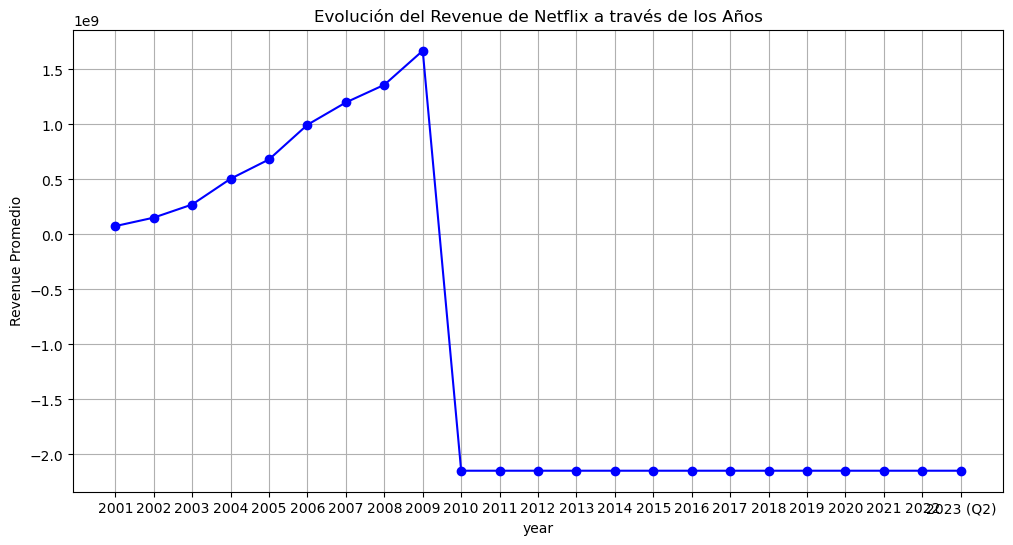

In [107]:
revenue_por_anio = Netflix.groupby('year')['revenue'].mean()

#Gráfico lineal
plt.figure(figsize=(12, 6))
plt.plot(revenue_por_anio.index, revenue_por_anio.values, marker='o', linestyle='-', color='b')
plt.title('Evolución del Revenue de Netflix a través de los Años')
plt.xlabel('year')
plt.ylabel('Revenue Promedio')
plt.grid(True)
plt.show()

## Largest internet companies by martekcap

In [79]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Largest internet companies by m")

In [80]:
Netflix.info

<bound method DataFrame.info of      Rank                       Name   Symbol      marketcap  price (USD)  \
0       1          Alphabet (Google)     GOOG  1656972247040          132   
1       2                     Amazon     AMZN  1311598837760          127   
2       3  Meta Platforms (Facebook)     META   772488298496          300   
3       4                    Tencent    TCEHY   368177807360           39   
4       5                    Alibaba     BABA   220907683840           87   
..    ...                        ...      ...            ...          ...   
277   278            Verb Technology     VERB        3151838            1   
278   279    Grom Social Enterprises     GROM        1915561            1   
279   280                       Winc    WBEVQ           2659            0   
280   281                       Ozon  OZON.ME              0            0   
281   282             Gamer Pakistan     GPAK              0            0   

           country  
0    United States  
1

In [81]:
Netflix.columns

Index(['Rank', 'Name', 'Symbol', 'marketcap', 'price (USD)', 'country'], dtype='object')

In [82]:
Netflix.rename(columns={"Rank":"rank","Name":"company","Symbol":"symbol","price (USD)":"price_usd"}, inplace=True)

Netflix.columns

Index(['rank', 'company', 'symbol', 'marketcap', 'price_usd', 'country'], dtype='object')

In [83]:
Netflix.head(100)

,rank,company,symbol,marketcap,price_usd,country
0,1,Alphabet (Google),GOOG,1656972247040,132,United States
1,2,Amazon,AMZN,1311598837760,127,United States
2,3,Meta Platforms (Facebook),META,772488298496,300,United States
3,4,Tencent,TCEHY,368177807360,39,China
4,5,Alibaba,BABA,220907683840,87,China
...,...,...,...,...,...,...
95,96,Squarespace,SQSP,3938935040,29,United States
96,97,momo.com Inc.,8454.TW,3748778454,16,Taiwan
97,98,Autohome,ATHM,3739787776,30,China
98,99,United Internet,UTDI.F,3695632214,21,Germany


In [84]:
Netflix.dtypes

rank           int64
company       object
symbol        object
marketcap      int64
price_usd    float64
country       object
dtype: object

In [85]:
#Usamos pd.to_numeric para identificar los valores no válidos y convertirlos en NaN (Valores faltantes)
Netflix['marketcap'] = pd.to_numeric(Netflix['marketcap'], errors='coerce')

Netflix

,rank,company,symbol,marketcap,price_usd,country
0,1,Alphabet (Google),GOOG,1656972247040,132,United States
1,2,Amazon,AMZN,1311598837760,127,United States
2,3,Meta Platforms (Facebook),META,772488298496,300,United States
3,4,Tencent,TCEHY,368177807360,39,China
4,5,Alibaba,BABA,220907683840,87,China
...,...,...,...,...,...,...
277,278,Verb Technology,VERB,3151838,1,United States
278,279,Grom Social Enterprises,GROM,1915561,1,United States
279,280,Winc,WBEVQ,2659,0,United States
280,281,Ozon,OZON.ME,0,0,United States


In [86]:
#Cambiar tipo de dato
Netflix["rank"]=Netflix["rank"].astype("int")
Netflix["company"]=Netflix["company"].astype("string")
Netflix["symbol"]=Netflix["symbol"].astype("string")
Netflix["marketcap"]=Netflix["marketcap"].astype("float")
Netflix["country"]=Netflix["country"].astype("string")

Netflix.dtypes

rank           int32
company       string
symbol        string
marketcap    float64
price_usd    float64
country       string
dtype: object

In [87]:
#poner separador de comas a los números de marketcap
def formatear_con_comas(numero):
    return f'{numero:,}'

#indicar la columna
Netflix['marketcap'] = Netflix['marketcap'].apply(formatear_con_comas)


Netflix

,rank,company,symbol,marketcap,price_usd,country
0,1,Alphabet (Google),GOOG,"1,656,972,247,040.0",132,United States
1,2,Amazon,AMZN,"1,311,598,837,760.0",127,United States
2,3,Meta Platforms (Facebook),META,"772,488,298,496.0",300,United States
3,4,Tencent,TCEHY,"368,177,807,360.0",39,China
4,5,Alibaba,BABA,"220,907,683,840.0",87,China
...,...,...,...,...,...,...
277,278,Verb Technology,VERB,"3,151,838.0",1,United States
278,279,Grom Social Enterprises,GROM,"1,915,561.0",1,United States
279,280,Winc,WBEVQ,"2,659.0",0,United States
280,281,Ozon,OZON.ME,0.0,0,United States


## Análisis General

Netflix, plataforma de streaming en la industria de medios y entretenimiento, se destaca por su impresionante base de suscriptores y su notorio valor de mercado a nivel global. Según los datos proporcionados en la tabla (actualizados hasta octubre de 2023), Netflix se posiciona como la sexta empresa más grande del mundo en términos de capitalización de mercado, consolidándose como una de las entidades más valiosas en el escenario empresarial actual.

Es relevante destacar que entre las 10 empresas con la mayor capitalización de mercado también figura Amazon, que, a su vez, ofrece la plataforma de streaming Amazon Prime Video. No obstante, se diferencia de Netflix en cuanto a su enfoque de negocio. Mientras que Netflix centra su estrategia en la adquisición y producción de contenido, posteriormente distribuido en su plataforma, para Amazon, la plataforma de streaming no representa su actividad principal. Esta distinción resalta el compromiso de Netflix con la oferta de contenido de calidad y su posición destacada en la industria del entretenimiento.

Fuente: 
-https://companiesmarketcap.com/internet/largest-internet-companies-by-market-cap/
-WORTEV®


In [88]:

Netflix.head(10)

,rank,company,symbol,marketcap,price_usd,country
0,1,Alphabet (Google),GOOG,"1,656,972,247,040.0",132,United States
1,2,Amazon,AMZN,"1,311,598,837,760.0",127,United States
2,3,Meta Platforms (Facebook),META,"772,488,298,496.0",300,United States
3,4,Tencent,TCEHY,"368,177,807,360.0",39,China
4,5,Alibaba,BABA,"220,907,683,840.0",87,China
5,6,Netflix,NFLX,"167,332,315,136.0",378,United States
6,7,Pinduoduo,PDD,"130,294,816,768.0",98,China
7,8,ServiceNow,NOW,"114,027,847,680.0",559,United States
8,9,Booking Holdings (Booking.com),BKNG,"110,072,954,880.0","3,084",United States
9,10,Uber,UBER,"93,981,491,200.0",46,United States


In [91]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Revenue_over_the_years")

Netflix.columns

Index(['Year', 'Revenue'], dtype='object')

In [ ]:
# Gráfico visualizar la distribución geográfica.

#Librería seaborn
sns.set(style="whitegrid")

# Contamos la presencia de Netflix en las diferentes regiones
regiones = Netflix['region'].value_counts()

#Gráfico de barras
plt.figure(figsize=(12, 6))  # Tamaño de la figura
sns.barplot(x=regiones.index, y=regiones.values, palette="viridis")  # Tipo de gráfico y colores
plt.xticks(rotation=90)  # Rotar etiquetas del eje x
plt.xlabel('Region')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.title('Distribución Geográfica de Netflix por Región')  # Título del gráfico
plt.tight_layout()  # Ajustar el diseño para evitar cortes en las etiquetas

plt.show()